# Algorithmes sur les graphes

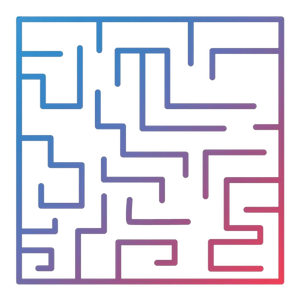
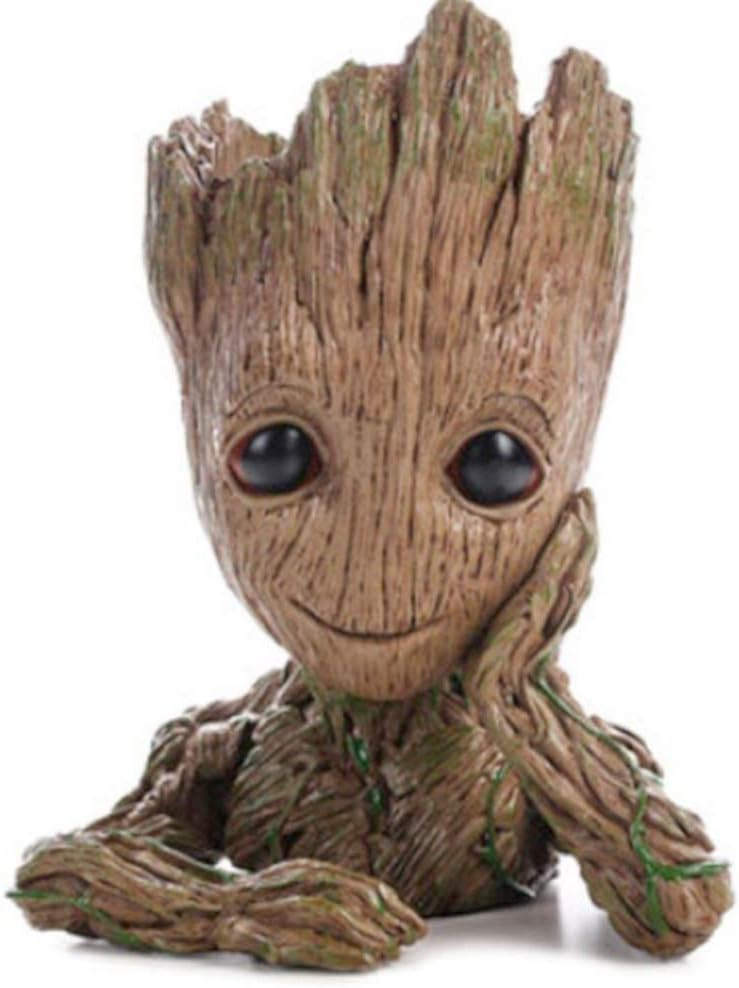
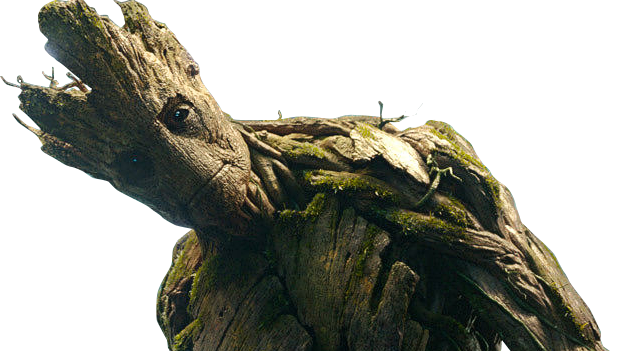
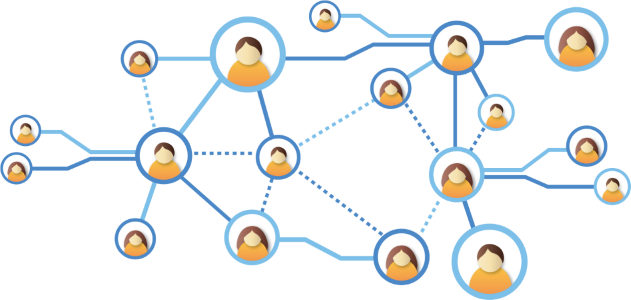

---
## Introduction

Un parcours de graphe est un algorithme consistant à **explorer tous les sommets en suivant les arêtes** qui les relient à partir d'un sommet initial. Ces parcours sont notamment utilisés pour rechercher un plus court chemin (et donc dans les GPS) ou pour trouver la sortie d'un labyrinthe…    
  
>⚠️ **Parcourir simplement le dictionnaire ou la matrice d'adjacence d’un graphe n’est pas considéré comme un parcours de graphe.**  


Contrairement à un parcours d'arbre, où l'on part systématiquement de la racine puis on suit un "ordre" précis (préfix, suffixe...), il faudra tout d'abord choisir un noeud de départ puis mémoriser les sommets déja visités ou découverts.
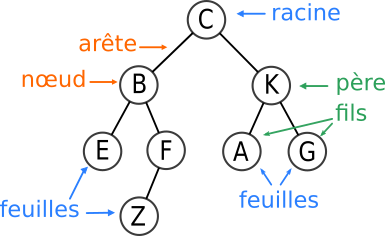
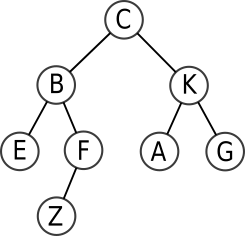
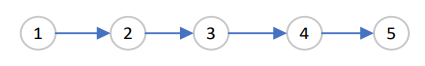
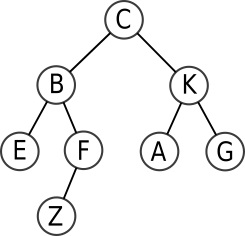

---
## Parcours en largeur ou BFS (Breadth First Search)

### Principe
L'algorithme de parcours en largeur suit le principe suivant : à partir d'un sommet, on atteint **d'abord ses voisins puis les voisins de ses voisins** et ainsi de suite jusqu'à visiter tous les sommets.  
Dans le parcours en largeur, on visite tous les sommets autour du sommet de départ : d’abord les sommets à une distance de 1, puis ceux à une distance de 2…  On l'appelle également parcours **concentrique** et il sert notamment à la recherche des plus courts chemins dans un graphe.  
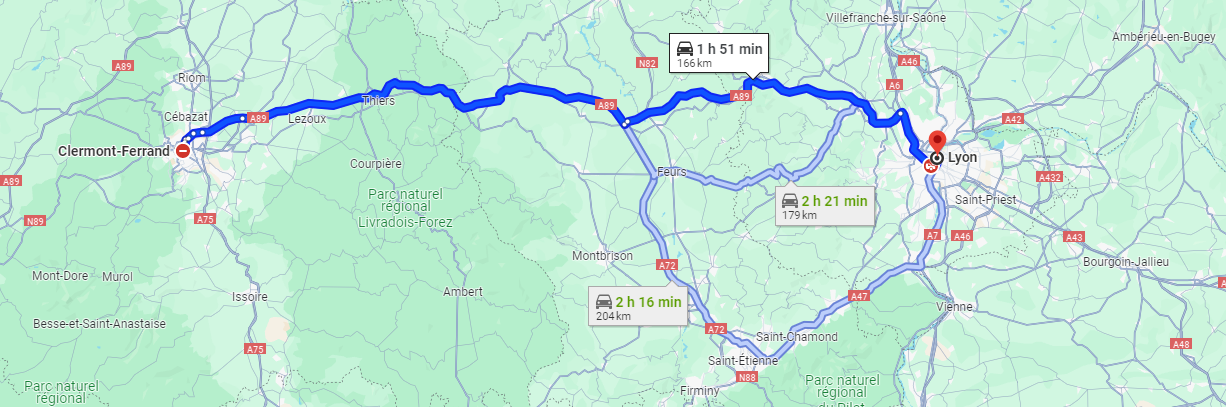
>💡 _Notez qu'il n'y a pas une unique façon de parcourir un graphe en largeur l'ordre de parcours des voisins étant arbitraire._

### Exemple avec un graphe non orienté
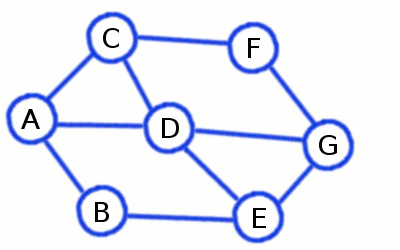

Dans le graphe ci-dessus, effectuons le parcous en largeur **à partir du sommet A** en choisissant de parcourir les voisins par ordre alphabétique :
- On commence par le sommet **A**
- Ensuite on visite les voisins de A : **B**, **C** et **D**
- Puis les voisins de B : **E**
- Puis les voisins de C : **F**
- Puis les voisins de D : **G**

Le parcours donne donc **A B C D E F G**, mais il aurait pu donner **A D C B G E F** si nous avions choisi de parcourir les voisins dans l'ordre inverse…



---
### 💻 EXERCICE 1
> - Donnez deux parcours en largeur du graphe à partir de `D`

> - Donnez deux parcours en largeur du graphe à partir de `B`

### Exemple avec un graphe orienté

Avec un graphe orienté, le principe est exactement le même. **On remplace simplement les voisins par les successeurs**. Ceci va naturellement restreindre les possibilités et tous les sommets ne seront pas forcément visités…  

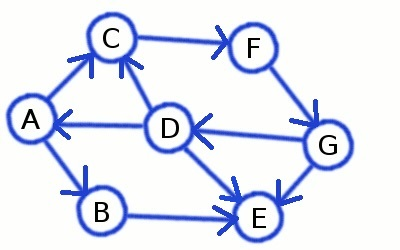

Dans le graphe ci-dessus, effectuons le parcours en largeur à partir du sommet **A** :

- On commence par le sommet **A** 
- Ensuite on visite les successeurs de A : **B** et **C**
- Puis les successeurs de B : **E**
- Puis les successeurs de C : **F**
- Puis les successeurs de E : Aucun sommet
- Puis les successeurs de F : **G**
- Puis les successeurs de G : **D**

Le parcours donne donc **A B C E F G D**, mais il aurait pu donner **A C B F E G D**…
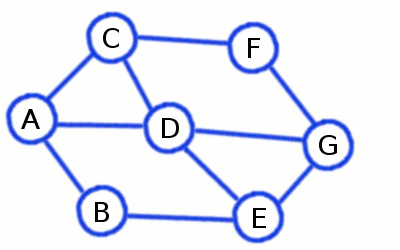
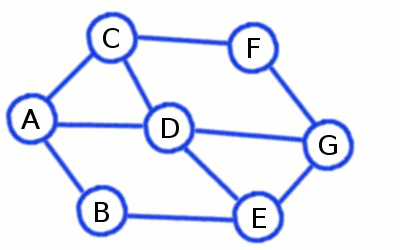
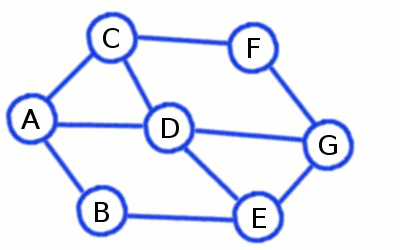

---
### 💻 EXERCICE 2
> - Donnez deux parcours en largeur du graphe à partir de `D`

> - Donnez deux parcours en largeur du graphe à partir de `B`

### Algorithme

Pour implémenter le parcours en largeur, nous utiliserons le même principe que pour le parcours en largeur d'un arbre binaire avec une **File** vu lors notre TP (_Algorithmes sur les Arbres Binaires de Recherche_). Cependant, nous allons devoir mémoriser la liste des sommets déjà visités pour éviter de "tourner en rond".  

Le principe est le suivant :
```
- On crée une liste vide qui contiendra la liste des sommets parcourus
- On crée une File
- On enfile le sommet de départ dans la file
- Tant que la file n'est pas vide :
    - On défile le sommet de la file
    - Si le sommet n'est pas déjà dans la liste des sommets parcourus :
        - On ajoute ce sommet à la liste des sommets parcourus
        - On enfile chaque voisin du sommet dans la file
- Pour finir on retourne la liste des sommets parcourus
```

### Implémentation

---
### 💻 EXERCICE 3
>- Donnez la liste des successeurs de chaque sommet du graphe précédent (reporté ici)  
> 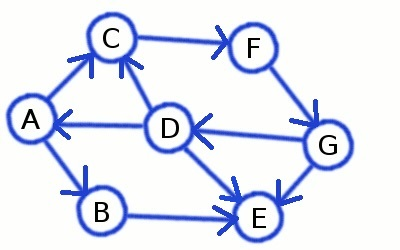

> - Implémentez maintenant le graphe dans une variable `G1` à l'aide d'un dictionnaire

In [ ]:
# à compléter


Ensuite, nous utiliserons la classe `File` vue lors des chapitres précédents :

In [ ]:
# à exécuter
class File:
    """Classe représentant une File"""
    
    def __init__(self):
        """Constructeur : File vide"""
        self.data = []

    def est_vide(self):
        """Renvoie True si la file est vide"""
        return len(self.data) == 0 

    def enfile(self, e):
        """Enfilage"""
        self.data.insert(0, e)

    def defile(self):
        """Défilage"""
        if self.est_vide():
            print('File vide !')
            return None
        else :
            return self.data.pop() 

    def __repr__(self):
        """Affichage"""
        s = '|' 
        for k in self.data:
            s = s + str(k) + '|'
        return s

---
### 💻 EXERCICE 4
>- Implémentez ci-dessous une fonction `BFS(g,s)` qui effectue un parcours en largeur du graphe `g` à partir du sommet `s`

In [ ]:
# à compléter


>- Vérifiez la fonction avec notre graphe `G1`

In [ ]:
# Vérification
print(BFS(G1,'A')) # Doit renvoyer A C B F E G D
print(BFS(G1,'B')) # Doit renvoyer B E
print(BFS(G1,'C')) # Doit renvoyer C F D E A B
print(BFS(G1,'D')) # Doit renvoyer D A C E B F G
print(BFS(G1,'E')) # Doit renvoyer E
print(BFS(G1,'F')) # Doit renvoyer F G D E A C B

> 💡 _Il n'existe pas obligatoirement un unique parcours en largeur. Or, la façon dont nous avons implémenter ce parcours donnera toujours le même résultat. On pourrait ajouter une part d'aléatoire dans le parcours il suffirait de mélanger la liste des voisins d'un sommet avant de les enfiler en utilisant la méthode `shuffle` du module `random` qui mélange les élément d'une liste._

---
### 💻 EXERCICE 5
>- Donnez la liste des successeurs de chaque sommet du graphe ci-dessous  
> 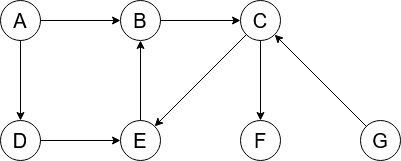

>- Donnez un parcours en largeur à partir de `A`

>- Implémentez le graphe dans une variable `G2` à l'aide d'un dictionnaire

In [ ]:
# à compléter


>- Vérifiez le parcours en largeur à partir de `A` à l'aide de votre fonction `BFS`

In [ ]:
# à compléter


---
## Parcours en profondeur ou DFS (Depth First Search)

L'algorithme de parcours en profondeur suit le principe suivant : à partir d'un sommet, on va aller **le plus loin possible** sans se préoccuper des autres voisins non visités. Il explore ainsi chaque chemin depuis le sommet de départ jusqu'à atteindre un cul-de-sac ou avoir visité tous les sommets, puis revient au dernier sommet où il était possible de prendre un chemin différent. Une application de ce type de parcours est la résolution de **labyrinthes**.  
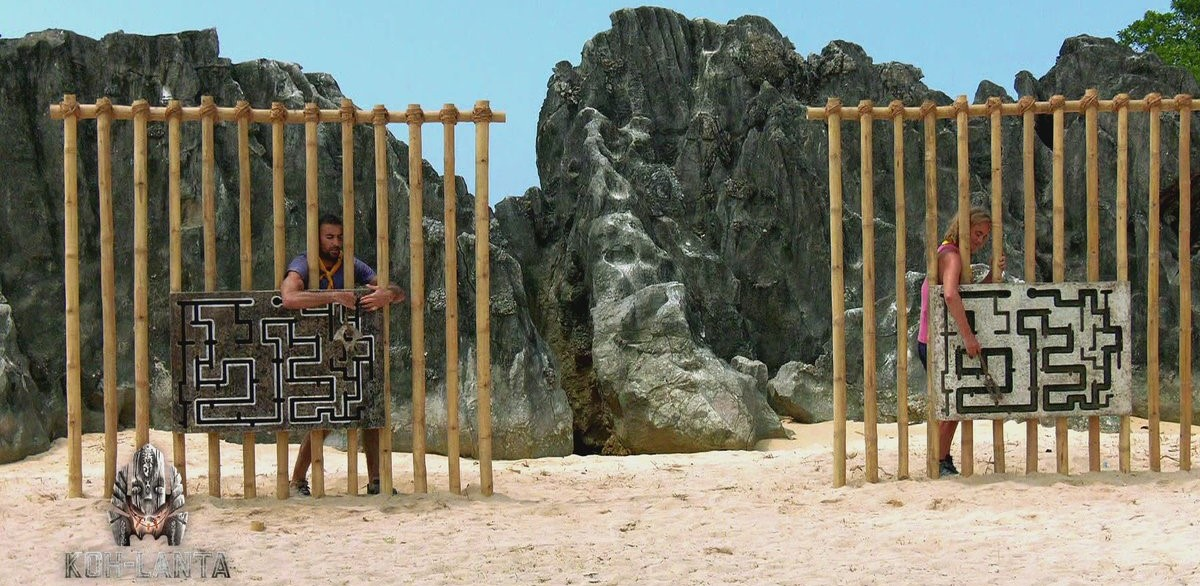


>💡 _Ici aussi, il n'y a pas une unique façon de parcourir un graphe en profondeur le choix des arêtes parcourues étant arbitraire._

### Exemple avec un graphe non orienté
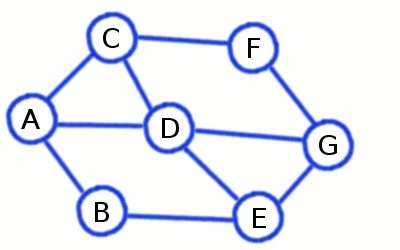

Dans le graphe ci-dessus, effectuons le parcours en profondeur **à partir du sommet A** :
- On commence par le sommet **A**
- Ensuite on visite le sommet **C**
- Puis le sommet **F**
- Puis le sommet **G**
- Puis le sommet **E**
- Puis le sommet **D**
- Plus de chemin possible, on remonte à E
- Ensuite on visite le sommet **B**

Le parcours donne donc **A C F G E D B**, mais il aurait pu donner **A B E G F C D** si nous avions choisi de parcourir les arêtes différemment…


---
### 💻 EXERCICE 6
> - Donnez deux parcours en profondeur du graphe à partir de `D`

> - Donnez deux parcours en profondeur du graphe à partir de `B`

### Exemple avec un graphe orienté

Avec un graphe orienté, le principe est exactement le même. **On remplace simplement les voisins par les successeurs**. Ceci va naturellement restreindre les possibilités et tous les sommets ne seront pas forcément visités…  

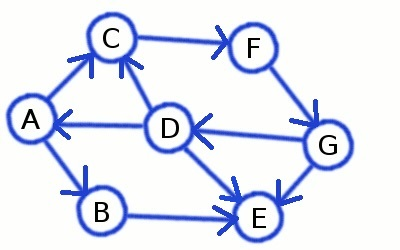

Dans le graphe ci-dessus, effectuons le parcours en profondeur **à partir du sommet A** :
- On commence par le sommet **A**
- Ensuite on visite le sommet **B**
- Puis le sommet **E**
- Plus de chemin possible, on remonte à B
- Plus de chemin possible, on remonte à A
- Ensuite on visite le sommet **C**
- Ensuite on visite le sommet **F**
- Ensuite on visite le sommet **G**
- Ensuite on visite le sommet **D**

Le parcours donne donc **A B E C F G D**, mais il aurait pu donner **A C F G E D B** si nous avions choisi de parcourir les arêtes différemment…

---
### 💻 EXERCICE 7
> - Donnez deux parcours en profondeur du graphe à partir de `D`

> - Donnez deux parcours en profondeur du graphe à partir de `B`

### Algorithme non récursif

L'implémentation non récursive a le même fonctionnement que celui du parcours en largeur à la différence près qu'on ne visite pas les voisins dans le même ordre.
Pour implémenter le parcours en profondeur, nous utiliserons une **Pile**. Nous allons devoir également mémoriser la liste des sommets déjà visités pour éviter de "tourner en rond".

Le principe est le suivant :
```
- On crée une liste vide qui contiendra la liste des sommets parcourus
- On crée une Pile
- On empile le sommet de départ dans la pile
- Tant que la pile n'est pas vide :
    - On dépile le sommet de la pile
    - Si le sommet n'est pas déjà dans la liste des sommets parcourus :
        - On ajoute ce sommet à la liste des sommets parcourus
        - On empile chaque voisin du sommet dans la pile
- Pour finir on retourne la liste des sommets parcourus
```

### Implémentation non récursive

Pour implémenter ce parcours, nous utiliserons la classe `Pile` vue lors des chapitres précédents :

In [ ]:
# à exécuter
class Pile():
    """Classe représentant une pile"""
    
    def __init__(self):
        """Constructeur : pile vide"""
        self.data=[]

    def est_vide(self):
        """Renvoie True si la pile est vide"""
        return len(self.data) == 0
    
    def empile(self,v):
        """Empilage"""
        self.data.append(v)
        
    def depile(self):
        """Dépilage"""
        if self.est_vide():
            print("Pile vide")
            return None
        else:
            return self.data.pop()
    
    def __repr__(self):
        """Affichage"""
        chaine = ""
        if self.est_vide():
            return "Pile vide"
        else:
            for e in self.data:
                chaine = chaine + str(e) + " "
            return chaine

---
### 💻 EXERCICE 8
>- Implémentez ci-dessous une fonction `DFS(g,s)` qui effectue un parcours en profondeur non récursif du graphe `g` à partir du sommet `s`

In [ ]:
# à compléter


>- Vérifiez la fonction avec notre graphe `G1`

In [ ]:
# Vérification
print(DFS(G1,'A')) # Doit renvoyer A B E C F G D
print(DFS(G1,'B')) # Doit renvoyer B E
print(DFS(G1,'C')) # Doit renvoyer C F G E D A B
print(DFS(G1,'D')) # Doit renvoyer D E C F G A B
print(DFS(G1,'E')) # Doit renvoyer E
print(DFS(G1,'F')) # Doit renvoyer F G E D C A B

### Algorithme récursif

Le principe du parcours en profondeur récursif à partir d'un sommet est le suivant :

```
- Si la liste des sommets parcourus n'a pas été initialisée (c'est donc le premier appel de la fonction récursive) alors on l'initialise en tant que liste vide
- On ajoute le sommet à la liste de sommets parcourus
- Pour chaque voisin de ce sommet :
    - Si le voisin n'est pas dans la liste de sommets parcourus :
        - On appelle récursivement le parcours en profondeur depuis ce sommet, en passant en paramètre la liste de sommets parcourus
- Pour finir, on retourne la liste de sommets parcourus
```

### Implémentation récursive
---
### 💻 EXERCICE 9
>- Implémentez ci-dessous une fonction `DFS_R(g,s,parc)` qui effectue un parcours en profondeur récursif du graphe `g` à partir du sommet `s` en utilisant la liste des sommets déjà parcourus `parc` initialisée à `None`

In [ ]:
def DFS_R(g,s,parcourus = None):
    
    # à compléter
    if parcourus is None :
        parcourus = []

    

>- Vérifiez la fonction avec notre graphe `G1`

In [ ]:
# Vérification
print(DFS_R(G1,'A')) # Doit renvoyer A C F G D E B
print(DFS_R(G1,'B')) # Doit renvoyer B E
print(DFS_R(G1,'C')) # Doit renvoyer C F G D A B E
print(DFS_R(G1,'D')) # Doit renvoyer D A C F G E B
print(DFS_R(G1,'E')) # Doit renvoyer E
print(DFS_R(G1,'F')) # Doit renvoyer F G D A C B E

---
### 💻 EXERCICE 10
>- Reprenons notre graphe `G2` de _l'exercice 5_  
> 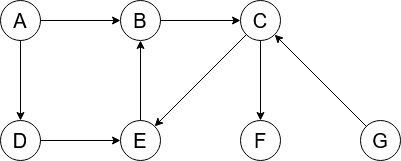   

>- Donnez un parcours en profondeur à partir de `A`

>- Vérifiez à l'aide de votre fonction `DFS` (reprenez la variable `G2` de _l'exercice 5_)

In [ ]:
# à compléter


---
## Présence d'un cycle

Pour différentes raisons, il peut être intéressant de détecter la présence d'un ou plusieurs cycles dans un graphe (par exemple pour savoir s'il est possible d'effectuer un parcours qui revient à son point de départ sans être obligé de faire demi-tour).

### Algorithme

L'algorithme qui permet de détecter la présence d'un cycle à partir d'un sommet dans un graphe est construit à partir de l'algorithme non récursif du parcours en profondeur (DFS), en effet nous allons aller le plus loin possible jusqu'à rencontrer à nouveau notre sommet de départ.  

Le principe est le suivant :
```
- On crée une liste vide qui contiendra la liste des sommets parcourus
- On crée une Pile
- On empile le sommet de départ dans la pile
- Tant que la pile n'est pas vide :
    - On dépile le sommet de la pile
    - Si le sommet est déjà dans la liste des sommets parcourus :
        - Retourner Vrai
    - Sinon :
        - On ajoute ce sommet à la liste des sommets parcourus
        - On empile chaque voisin du sommet dans la pile
- Retourner Faux
```

### Implémentation

---
### 💻 EXERCICE 11
>- Implémentez ci-dessous une fonction `cycle(g,s)` qui effectue la recherche d'un cycle dans le graphe `g` en partant du sommet `s` en utilisant l'implémentation du parcours en profondeur non-récursif de l'exercice 8.  
> La fonction renverra `True` si un cycle est trouvé et `False` sinon.

In [ ]:
# à compléter


>- Vérifiez la fonction avec notre graphe `G1`

In [ ]:
# Vérification
print(cycle(G1,'A')) # Doit renvoyer True (A C F G D A)
print(cycle(G1,'B')) # Doit renvoyer False
print(cycle(G1,'C')) # Doit renvoyer True (C F G D)
print(cycle(G1,'D')) # Doit renvoyer True (D C F G D)
print(cycle(G1,'E')) # Doit renvoyer False

**⚠️ ATTENTION, l'algorithme recherche un cycle EN PARTANT du sommet `s` passé en paramètre.**  
  
Dans notre graphe `G2` par exemple, en partant de `A`, il est possible de parcourir le chemin `A - B - C - E - B` qui comporte un cycle (`B-C-E-B`) mais il ne part pas de `A`.  
>- Vérifiez la fonction avec notre graphe `G2`

In [ ]:
# Vérification
print(cycle(G2,'A')) # Doit renvoyer True (A B C E B cycle à partir de B)
print(cycle(G2,'B')) # Doit renvoyer True (B C E B)
print(cycle(G2,'C')) # Doit renvoyer True (C E B C)
print(cycle(G2,'D')) # Doit renvoyer True (D E B C E cycle à partir de E)
print(cycle(G2,'E')) # Doit renvoyer True (E B C E)
print(cycle(G2,'F')) # Doit renvoyer False
print(cycle(G2,'G')) # Doit renvoyer True (G C E B C  cycle à partir de C)

---
### 💻 EXERCICE 12
>- Implémentez ci-dessous une fonction `cycleG(g)` qui effectue la recherche d'un cycle dans le graphe `g` et renvoie la liste des sommets pour lesquels un cycle existe.

In [ ]:
# à compléter


>- Listez les sommets de `G1` à partir desquels un cycle est possible

>- Vérifiez la fonction `cycleG` avec notre graphe `G1`

In [ ]:
# Vérification
print(cycleG(G1))

---
## Chercher des chemins dans un graphe

Pour effectuer des calculs d'itinéraires par exemple, il peut être intéressant de détecter la présence d'un ou plusieurs chemins(ou chaînes) dans un graphe en partant d'un sommet vers un autre.

### Algorithme

L'algorithme qui permet de détecter la présence d'un chemin d'un sommet de départ vers un sommet d'arrivée dans un graphe est construit à partir de l'algorithme récursif du parcours en profondeur (DFS)  

Le principe est le suivant :
```
- Si la liste du chemin en cours (`chaine`) n'a pas été initialisée (c'est donc le premier appel de la fonction récursive) alors on l'initialise en tant que liste vide
- On ajoute le sommet de départ à la cette liste
- Si le départ = arrivée :
    - Renvoyer le chemin en cours
- Pour chaque voisin du sommet de départ :
    - Si le voisin n'est pas dans le chemin en cours :
        - On appelle récursivement la recherche depuis ce sommet, en passant en paramètre le chemin en cours
        - Si le chemin retourné par l'appel récursif est non vide :
            - Retourner ce nouveau chemin
- Retourner None
```

### Implémentation

---
### 💻 EXERCICE 13
>- Implémentez ci-dessous une fonction `chemin(g,deb,fin,chaine)` qui effectue la recherche d'un chemin dans le graphe `g` du sommet `deb` vers le sommet `fin`.  
> La fonction renverra le chemin trouvé et `None` si pas de chemin trouvé.

In [ ]:
def chemin(g,deb,fin,chaine = None):
    
    # à compléter
    if chaine is None :
        chaine = []
    
    

>- Vérifiez la fonction avec notre graphe `G1`

In [ ]:
# Vérification
print(chemin(G1,'A','E')) # Doit renvoyer A C F G D E
print(chemin(G1,'E','A')) # Doit renvoyer None
print(chemin(G1,'D','F')) # Doit renvoyer D A C F 
print(chemin(G1,'B','E')) # Doit renvoyer B E
print(chemin(G1,'B','D')) # Doit renvoyer None

>- Vérifiez la fonction avec notre graphe `G2`

In [ ]:
# Vérification
print(chemin(G2,'A','E')) # Doit renvoyer A B C E
print(chemin(G2,'A','G')) # Doit renvoyer None
print(chemin(G2,'C','B')) # Doit renvoyer C E B 
print(chemin(G2,'D','F')) # Doit renvoyer D E B C F
print(chemin(G2,'C','A')) # Doit renvoyer None